<h2>Multiple Linear Regression</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])


In [4]:
X = df[["Hours Studied", "Previous Scores", "Sleep Hours"]]
y = df["Performance Index"]


In [5]:
#X

<h4>Split Dataset</h4>

In [6]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42)


<h4>Train the Model</h4>

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

<h4>Make Predictions</h4>

In [8]:
y_pred=model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

<h4>Evaluate Model</h4>

In [10]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 1.7044084321401283
MSE: 4.545107899420585
RMSE: 2.131925866305061
R² Score: 0.9877353198949831


In [11]:
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")



Intercept: -32.756399500983356
Hours Studied: 2.8559175770513585
Previous Scores: 1.0173792885711976
Sleep Hours: 0.473391385397089


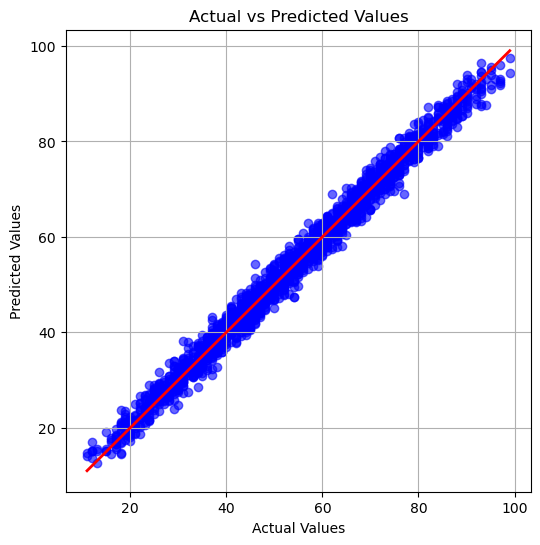

In [12]:
# ============================
# 📈 Scatter Plots
# ============================

# 1️⃣ Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

